In [1]:
import numpy as np


#加载数据
def load_data():
    with open('简单逻辑回归.txt') as fr:
        lines = fr.readlines()

    x = np.empty((len(lines), 2), dtype=float)
    y = np.empty(len(lines), dtype=int)
    for i in range(len(lines)):
        line = lines[i].strip().split("\t")
        x[i] = line[:2]
        y[i] = line[2]

    return x, y


w = np.ones(2)
b = 0

x, y = load_data()
x[:10], y[:10]

(array([[-0.017612, 14.053064],
        [-1.395634,  4.662541],
        [-0.752157,  6.53862 ],
        [-1.322371,  7.152853],
        [ 0.423363, 11.054677],
        [ 0.406704,  7.067335],
        [ 0.667394, 12.741452],
        [-2.46015 ,  6.866805],
        [ 0.569411,  9.548755],
        [-0.026632, 10.427743]]),
 array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0]))

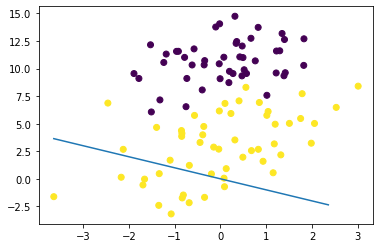

In [2]:
import matplotlib.pyplot as plt


#把线画出来,线就是wx + b = 0
def draw():
    X = np.arange(x[:, 0].min(), x[:, 0].max(), 1)
    Y = np.empty([len(X)])
    for i in range(len(X)):
        Y[i] = (-w[0] * X[i] - b) / w[1]

    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.plot(X, Y)

    plt.show()


draw()

In [3]:
def model(x):

    #计算模型
    out = x.dot(w) + b

    #激活函数,把数据压缩到0-1之间
    out = 1 / (1 + np.exp(-out))

    return out


pred = model(x[0])
pred

0.999999197434851

In [4]:
#求误差
def loss(pred, y):
    return y - pred


l = loss(pred, y[0])
l

-0.999999197434851

In [5]:
#求梯度
def gradient(loss, x):

    #w的梯度是抄书的,我也不知道为什么是这么算
    #简单理解,就是x0*loss + x1*loss = gradient
    #也就是说,loss决定了方向和步长,x的值决定了另一个方向和步长.
    g_w = loss * x

    #这个是我自己写的,简单的求和就完事了
    g_b = loss.sum()

    return g_w, g_b


gradient(l, x[0])

(array([  0.01761199, -14.05305272]), -0.999999197434851)

In [6]:
#训练
lr = 1
for i in range(10):
    for xi, yi in zip(x, y):
        pred = model(xi)
        l = loss(pred, yi)
        g_w, g_b = gradient(l, xi)
        w += g_w * lr
        b += g_b * lr

    #lr递减
    lr /= 2

    #防止变成0
    lr += 1e-5

w, b

(array([ 4.67272613, -3.05600659]), 21.269580883747157)

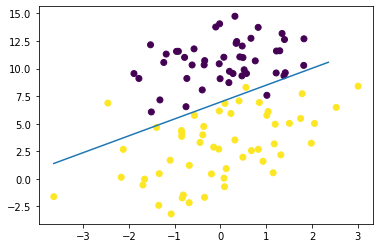

In [7]:
#画图
draw()

In [8]:
#预测
correct = 0
for xi, yi in zip(x, y):
    #计算模型
    pred = xi.dot(w) + b

    #激活函数,把数据压缩到0-1之间
    pred = 1 / (1 + np.exp(-pred))

    #I函数
    pred = 1 if pred > 0.5 else 0

    if pred == yi:
        correct += 1

correct / len(x)

0.97